In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
X = data['review'].tolist()
y = data['sentiment'].tolist()

In [4]:
!pip install simple_nlp_library

In [5]:
from simple_nlp_library import embeddings, preprocessing

In [6]:
stop_words = preprocessing.stop_words()
vectors = embeddings.vectors()

In [7]:
X = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in X]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(25), early_stopping=True, n_iter_no_change=20).fit(X_train, y_train)

In [10]:
#Also Testing with random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
yp = rf.predict(X_test)
yp

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [12]:
clf.best_validation_score_

0.77925

In [13]:
import matplotlib.pyplot as plt

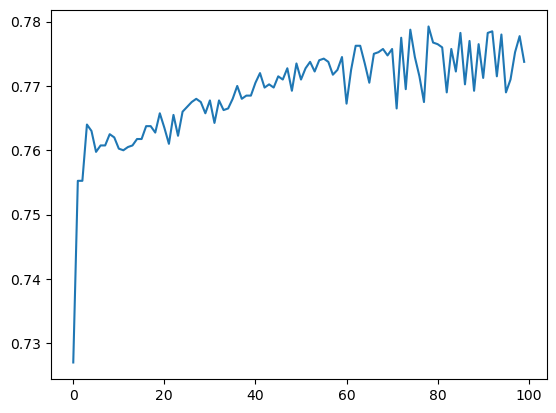

In [14]:
plt.plot(clf.validation_scores_)

In [15]:
y_train_pred = list(clf.predict(X_train))
y_test_pred = list(clf.predict(X_test))

In [16]:
y_test_pred

['negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_train, y_train_pred)

0.776375

In [19]:
accuracy_score(yp, y_test)

0.7545

In [20]:
accuracy_score(y_test, y_test_pred)

0.7693

In [21]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [22]:
import gradio as gr

In [23]:
def sentiment_analyzer(text):
    ls = []
    ls.append(text)
    ls = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in ls]
    return rf.predict(ls)[0].upper()
    


with gr.Blocks() as demo:
    gr.Markdown("Enter a Review and See the Sentiment of it")
    gr.Interface(fn=sentiment_analyzer, inputs="text", outputs="text")
    
if __name__ == "__main__":
    demo.launch(show_api=True)   

Running on local URL:  http://127.0.0.1:7876

To create a public link, set `share=True` in `launch()`.
